# Real-world Data Wrangling

## 1. Gather data

### **1.1.** Problem Statement

#### Statement: Does a higher level of education increase the likelihood of electric vehicle ownership in Washington State in 2022?

### **Dataset 1**: 2022 Electric Vehicle Population

**Describe**: This dataset presents a comprehensive overview of electric vehicle registrations across all US states in 2022.

**Type**: The csv file format inside the zipfile folder.

**Method 1**: Using the API requests through Kaggle library:
1. Create New API Kaggle Token.
2. Save the 'kaggle.json' token to the "~/.kaggle/" directory.
3. Intalls **kaggle** library (!pip install kaggle)
4. Find the link to the dataset ("https://www.kaggle.com/datasets/willianoliveiragibin/electric-vehicle-population").
5. Use the kaggle library to download the file (!kaggle datasets download -d <username>/<dataset-name>).
6. import **zipfile** library to unzip the file.
7. Using the pandas to read_csv file from the unzip file. 

**Dataset variables**:

*   *Variable 1*: **VIN(1-10)**: The Vehicle Identification Number for each registered vehicle.
*   *Variable 2*: **County** : The county which vehicle is registered.
*   *Variable 3*: **City**: The city which vehicle is registered.
*   *Variable 4*: **State**: The state which vehicle is registered.
*   *Variable 5*: **Postal Code**: The zipcode which vehicle is registered.
*   *Variable 6*: **Model Year**: The model year of the vehicle.
*   *Variable 7*: **Make**: The vehicle brand name.
*   *Variable 8*: **Model**: The model name of the vehicle.
*   *Variable 9*: **Electric Vehicle Type**: The type of the vehicle.
*   *Variable 10*: **Electric Range**: The range of the vehicle. 

In [1]:
#FILL IN 1st data gathering and loading method
# Step 1: Imports all the related libraries. 

import pandas as pd #This will help to manipulate the csv file. 
import requests #This library will help to request the url direclty from python.
import zipfile #This library will help to unzip the folder.
import os #This library will help to interact with the system from python
import shutil

In [180]:
# Step 2: 
# Assessing the Kaggle.com - register account - download the API token as kaggle.json
# Upload on Jupyter Notebook workspace.

In [2]:
# Step 3: (3.1) Create the .kaggle directory to store the kaggle.json file
kaggle_dir = '/home/student/.kaggle'  
os.makedirs(kaggle_dir, exist_ok=True)

In [3]:
# Step 3: (3.2) Check to see if successful create the .kaggle directory
!ls -a /home/student/

.  ..  .bash_logout  .bashrc  .ipython	.jupyter  .kaggle  .local  .profile


In [4]:
# Step 3: (3.3) Copy the kaggle.json and paste it to .kaggle directory
shutil.copy('kaggle.json', os.path.join(kaggle_dir, 'kaggle.json'))

'/home/student/.kaggle/kaggle.json'

In [5]:
# Step 3: (3.4) This line code will help to cover my API Key from another from the shared workspace.
!chmod 600 /home/student/.kaggle/kaggle.json

In [6]:
# Step 4: (4.1) Installs kaggle library
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 1.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 14.7 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105786 sha256=4e7110cb6dde03a1855a22120dc2a58b0ff50504d3452d4c1566af27dd96a14a
  Stored in directory: /home/student/.cache/pip/wheels/9f/af/22/bf406f913dc7506a485e60dce8143741abd0a92a19337d83a3
Successfully built kaggle
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [7]:
# Step 4: (4.2) (The warning from the stalling the kaggle library) - Add the directory to PATH
os.environ['PATH'] += ':/home/student/.local/bin'

In [8]:
# Verify to see if kaggle is in the right path
!which kaggle

/home/student/.local/bin/kaggle


In [ ]:
# Step 5: Find the link from kaggle.com for the "Electric Vehicle Population"
#https://www.kaggle.com/datasets/willianoliveiragibin/electric-vehicle-population

In [12]:
# Step 6: Using the kaggle library to download from <willianoliveiragibin>/<electric-vehicle-population>
!kaggle datasets download -d willianoliveiragibin/electric-vehicle-population

Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/electric-vehicle-population
License(s): CC0-1.0
100%|██████████████████████████████████████| 4.71M/4.71M [00:00<00:00, 48.5MB/s]
100%|██████████████████████████████████████| 4.71M/4.71M [00:00<00:00, 48.2MB/s]


In [13]:
# Step 7: Using ZipFile from the zipfile library to unzip the downloaded file.
with zipfile.ZipFile('electric-vehicle-population.zip','r') as zip_ref:
    zip_ref.extractall('electric-vehicle-population/')

In [14]:
!ls electric-vehicle-population/

Electric_Vehicle_Population_Data.csv


In [2]:
df_ev = pd.read_csv('electric-vehicle-population/Electric_Vehicle_Population_Data.csv')

In [16]:
df_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         150482 non-null  object 
 1   County                                             150479 non-null  object 
 2   City                                               150479 non-null  object 
 3   State                                              150482 non-null  object 
 4   Postal Code                                        150479 non-null  float64
 5   Model Year                                         150482 non-null  int64  
 6   Make                                               150482 non-null  object 
 7   Model                                              150482 non-null  object 
 8   Electric Vehicle Type                              150482 non-null  object

----

### Dataset 2: Education Attainments by zipcode in Washington State (2022)

**Describe**: This dataset includes comprehensive data on the educational levels of individuals residing in Washington State, categorized by zip code for the year 2022.

**Type**: Directly download csv files format from Census Bureau website.

**Method**: Directly download the zip files from the website. 
1. From browser accessing the https://data.census.gov - Using the advanced search to extract the dataset based on geographies and variables.
2. Downloads the zip files.
3. Uploads the zip files on the workspace  
4. Using the **zipfile** library to unzip the file.
5. Using the **pandas** to read the csv files.
6. Storing all the created dataframes to local site. 

**Dataset 2 variables**:

*   *Variable 1*: (GEO_ID) is the identification of geography
*   *Variable 2*: (NAME) is the zipcode number.
*   *Variable 3 and more*: (S1501_C01_001E and ....) represents for each difference variable in the dataset. Which need to be explored for more information.

In [ ]:
#FILL IN 2nd data gathering and loading method
# Step 1: Accessing the https://data.census.gov - Extract the desired datasets.

In [ ]:
# Step 2: Downloads the zip file for the dataset.
# Dataset: The Education based on all zipcodes in Washington State.

In [ ]:
# Step 3: Uploading the zip files to workspace: census_education.zip.

In [17]:
# Step 4: (4.1) Unzip the census_education.zip file by zipfile library - save it to census folder.
with zipfile.ZipFile('census_education.zip','r') as zip_ref_01:
    zip_ref_01.extractall('census/')

In [18]:
# Step 4: (4.2) checking the extract file. - should be "ACSST5Y2022.S1501-Data.csv"
!ls census/

ACSST5Y2022.S1501-Column-Metadata.csv  ACSST5Y2022.S1501-Table-Notes.txt
ACSST5Y2022.S1501-Data.csv


In [3]:
# Step 5: (5.1) read the csv files and assign to data frame:
df_education_wa = pd.read_csv("census/ACSST5Y2022.S1501-Data.csv")

In [4]:
# Step 5: (5.2) Check to see the df_education_wa was successfully created 
df_education_wa.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,...,S1501_C06_060M,S1501_C06_061E,S1501_C06_061M,S1501_C06_062E,S1501_C06_062M,S1501_C06_063E,S1501_C06_063M,S1501_C06_064E,S1501_C06_064M,Unnamed: 770
0,Geography,Geographic Area Name,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,NaN
1,860Z200US83856,ZCTA5 83856,396,197,108,94,192,142,68,79,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
2,860Z200US98001,ZCTA5 98001,2387,403,384,205,702,210,977,237,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
3,860Z200US98002,ZCTA5 98002,3132,648,614,223,1402,432,879,298,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
4,860Z200US98003,ZCTA5 98003,4332,718,856,271,1517,374,1713,508,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [21]:
# Step 6: Store all created dataframes by using pandas.
# Create the raw_data folder to contain the raw datasets.
folder_path_00 = "database/data/raw_data"
os.makedirs(folder_path_00, exist_ok=True)

In [22]:
# Using pandas function to programmatically save the raw files as .csv format to the raw_data folder.
df_ev.to_csv('database/data/raw_data/df_ev_wa_raw.csv', index=False)
df_education_wa.to_csv('database/data/raw_data/df_education_wa_raw.csv', index=False)

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1 (Aseess Step): Completeness issue in the df_ev dataset.

In [ ]:
# Completeness issue - Inspecting the dataframe programmatically
## The dataset: df_ev
## The column: Postal Code
## Describe: Using the .isnull().sum() to see total null values in the Postal Code column

In [24]:
# Inspecting the dataframe programmatically
df_ev.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 341
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [23]:
# Inspecting the dataframe programmatically
df_ev['Postal Code'].isnull().sum()

3

**Issue and justification**:
- Using the **df_ev.dropna(subset=['Postal Code'])** function to drop the row contain the **null** value. 

### Quality Issue 2 (Assess Step): Validity issue in the df_ev dataset.

In [ ]:
# Validity issue - Inspecting the dataframe visually
## The dataset: df_ev
## The column: Postal Code
## Describe: The result from df_ev.head() show the Postal Code format type is "Float" instead of "Object"

In [25]:
df_ev.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
# Validity issue - Inspecting the dataframe programmatically
## The dataset: df_ev
## The column: Postal Code
## Describe: Using the df_ev.info() to obseve the data type of the Postal Code column

In [26]:
# Inspecting the dataframe programmatically
df_ev['Postal Code'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150482 entries, 0 to 150481
Series name: Postal Code
Non-Null Count   Dtype  
--------------   -----  
150479 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


**Issue and justification**: 
1. Using the **.astype()** function to convert the **float64** to **str**.
2. Using the string .split() function to slice the string value before the (".")

### Quality Issue 3 (Assess Step): Uniqueness issue in the df_ev dataset. 

In [24]:
# Uniqueness issue - Inspecting the dataframe programmatically
## The dataset: df_ev
## The column: VIN (1-10)
## Describe: Using the .duplicated().sum() to see the number of duplicated VIN. 

In [27]:
# Inspecting the dataframe programmatically
df_ev['VIN (1-10)'].duplicated().sum()

140953

**Issue and justification**: Using the .drop_duplicates(subset='VIN (1-10)', keep='last',inplace=TRUE) to drop the duplicated VIN.

### Quality Issue 4 (Assess Step): Validity issue column names in df_education_wa

In [56]:
# Validity issue - Inspecting the dataframe visually with .head()
## The dataset: df_education_wa
## Describe: The name of columns are not understandable.

In [28]:
# Inspecting the dataframe visually with .head()
df_education_wa.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,...,S1501_C06_060M,S1501_C06_061E,S1501_C06_061M,S1501_C06_062E,S1501_C06_062M,S1501_C06_063E,S1501_C06_063M,S1501_C06_064E,S1501_C06_064M,Unnamed: 770
0,Geography,Geographic Area Name,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,NaN
1,860Z200US83856,ZCTA5 83856,396,197,108,94,192,142,68,79,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
2,860Z200US98001,ZCTA5 98001,2387,403,384,205,702,210,977,237,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
3,860Z200US98002,ZCTA5 98002,3132,648,614,223,1402,432,879,298,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
4,860Z200US98003,ZCTA5 98003,4332,718,856,271,1517,374,1713,508,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN


Issue and justification: 
1. Read the metadata csv file to understand the name of each column.
2. Re-name the column to understandable variables. 

### Quality Issue 5 (Assess Step): Validity issue in the df_education_wa dataset.

In [ ]:
# Validity issue - Inspecting the dataframe visually.
## The dataset: df_education_wa
## The column: NAME
## Describe: Using the .head() function to observe the column NAME.

In [29]:
# Inspecting the dataframe visually.
df_education_wa.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,...,S1501_C06_060M,S1501_C06_061E,S1501_C06_061M,S1501_C06_062E,S1501_C06_062M,S1501_C06_063E,S1501_C06_063M,S1501_C06_064E,S1501_C06_064M,Unnamed: 770
0,Geography,Geographic Area Name,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,NaN
1,860Z200US83856,ZCTA5 83856,396,197,108,94,192,142,68,79,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
2,860Z200US98001,ZCTA5 98001,2387,403,384,205,702,210,977,237,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
3,860Z200US98002,ZCTA5 98002,3132,648,614,223,1402,432,879,298,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
4,860Z200US98003,ZCTA5 98003,4332,718,856,271,1517,374,1713,508,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN


Issue and Justification: 
1. Using the .astype() function to ensure the NAME column is in string type.
2. Using the string .split() fucntion to extract the part after (" ").


### Tidiness Issue 1 (Assess Step): Each column is a variable in the df_ev dataset.

In [82]:
# The 'Vehicle Location' column contains a combination data which should be two seperated variables
# Inspecting the dataframe visually
## The dataset: df_education_wa
## Describe: Run .head() the resulted dataset including many variables column not support for the purpose.

### (assessing this column with purpose to demonstrate the ability to handle wrangling task)

In [5]:
# Inspecting the dataframe visually
df_ev.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10


**Issue and justification**: 
1. Using the string .replace() function to replace the 'POINT ( )' for ' '.
2. using the string .split() function to get the Longtitude and Latitude valures and assign they to two seperated variable columns from the 'Vehicle Location' column.
3. Dropping the 'Vehicle Location' column.
4. Converting the Longtitude and Latitude data type from 'str' to 'float' for accessible when need it. 

### Tidiness Issue 2 (Assess Step): Each row in the df_education_wa_assess is not an observated variable.

In [ ]:
# The first row in the df_education_wa_assess is not an observated variable. - Inspecting the dataframe visually
## The dataset: df_education_wa
## Describe: Using the .head() to print out the rows of the dataset.

In [31]:
# Inspecting the dataframe visually
df_education_wa.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,...,S1501_C06_060M,S1501_C06_061E,S1501_C06_061M,S1501_C06_062E,S1501_C06_062M,S1501_C06_063E,S1501_C06_063M,S1501_C06_064E,S1501_C06_064M,Unnamed: 770
0,Geography,Geographic Area Name,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...,...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female!!MEDIAN EARNIN...,NaN
1,860Z200US83856,ZCTA5 83856,396,197,108,94,192,142,68,79,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
2,860Z200US98001,ZCTA5 98001,2387,403,384,205,702,210,977,237,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
3,860Z200US98002,ZCTA5 98002,3132,648,614,223,1402,432,879,298,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN
4,860Z200US98003,ZCTA5 98003,4332,718,856,271,1517,374,1713,508,...,(X),(X),(X),(X),(X),(X),(X),(X),(X),NaN


**Issue and justification**: 
Using the .drop(index=) function to drop the first index from the df_education_wa_assess.

## 3. Clean data

In [7]:
#  Make copies of the datasets to ensure the raw dataframes 
df_ev_assess = df_ev.copy()
df_education_wa_assess = df_education_wa.copy()
# From now the dataset (df_ev will be assess as the df_ev_assess) 
# & the dataset (df_education_wa_assess will represents for df_education_wa). 

### **Quality Issue 1 (Clean Step): Completeness issue of the df_ev_assess dataset**

In [44]:
# Check the NA value in the Postal Code column
df_ev_assess['Postal Code'].isnull().sum()


3

In [45]:
# (Strategy) Using the .dropna() function to drop the row with null values
df_ev_assess = df_ev_assess.dropna(subset=['Postal Code'])

In [46]:
# (Validate) Using assert function to programmatically check the null value in the column Postal Code 
assert df_ev_assess['Postal Code'].isnull().sum().sum() == 0

**Justification:** Deleted 3 rows containing the null value in the Postal Code column.

### **Quality Issue 2 (Clean Step): Validity issue in the df_ev_assess dataset**

In [36]:
# Programmatically inspect the df_ev_assess dataset by .info() function
df_ev_assess['Postal Code'].info()

<class 'pandas.core.series.Series'>
Index: 150479 entries, 0 to 150481
Series name: Postal Code
Non-Null Count   Dtype  
--------------   -----  
150479 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [47]:
# (Strategy) Using the astype function to convert the data type for the Postal Code column 
df_ev_assess['Postal Code'] = df_ev_assess['Postal Code'].astype(str)

In [48]:
# (Strategy) Using the string .split() function to slice the string value before the (".").
df_ev_assess['Postal Code'] = df_ev_assess['Postal Code'].str.split('.').str[0]

In [49]:
# (Validate) the cleaning was successful
assert df_ev_assess['Postal Code'].dtype =='object'

**Justification:** Converted the data type of the Postal Code column from float to object

### **Quality Issue 3 (Clean Step): Uniqueness issue in (VIN (1-10)) column of the df_ev_assess dataset**

In [50]:
# Programmatically check the duplicated values in the column VIN (1-10)
df_ev_assess['VIN (1-10)'].duplicated().sum()

140951

In [51]:
# (Strategy) Programmatically apply .drop_duplicates() function to drop duplicated values.
df_ev_assess = df_ev_assess.drop_duplicates(subset='VIN (1-10)')

In [52]:
assert df_ev_assess['VIN (1-10)'].duplicated().any() == False

**Justification:** From 140951 duplicated values in the column: VIN (1-10) to 0 duplicated value.

### Quality Issue 4 (Clean Step): Validity issue column names in df_education_wa_assess not understandable.

In [22]:
# 2.1 (Investigate) Visually investigate the dataset 
df_education_wa_assess.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,S1501_C01_005E,S1501_C01_005M,S1501_C01_006E,S1501_C01_006M,S1501_C01_007E,S1501_C01_007M,S1501_C01_008E,S1501_C01_008M,S1501_C01_009E,S1501_C01_009M,S1501_C01_010E,S1501_C01_010M,S1501_C01_011E,S1501_C01_011M,S1501_C01_012E,S1501_C01_012M,S1501_C01_013E,S1501_C01_013M,S1501_C01_014E,S1501_C01_014M,S1501_C01_015E,S1501_C01_015M,S1501_C01_016E,S1501_C01_016M,S1501_C01_017E,S1501_C01_017M,S1501_C01_018E,S1501_C01_018M,S1501_C01_019E,S1501_C01_019M,S1501_C01_020E,S1501_C01_020M,S1501_C01_021E,S1501_C01_021M,S1501_C01_022E,S1501_C01_022M,S1501_C01_023E,S1501_C01_023M,S1501_C01_024E,S1501_C01_024M,S1501_C01_025E,S1501_C01_025M,S1501_C01_026E,S1501_C01_026M,S1501_C01_027E,S1501_C01_027M,S1501_C01_028E,S1501_C01_028M,S1501_C01_029E,S1501_C01_029M,S1501_C01_030E,S1501_C01_030M,S1501_C01_031E,S1501_C01_031M,S1501_C01_032E,S1501_C01_032M,S1501_C01_033E,S1501_C01_033M,S1501_C01_034E,S1501_C01_034M,S1501_C01_035E,S1501_C01_035M,S1501_C01_036E,S1501_C01_036M,S1501_C01_037E,S1501_C01_037M,S1501_C01_038E,S1501_C01_038M,S1501_C01_039E,S1501_C01_039M,S1501_C01_040E,S1501_C01_040M,S1501_C01_041E,S1501_C01_041M,S1501_C01_042E,S1501_C01_042M,S1501_C01_043E,S1501_C01_043M,S1501_C01_044E,S1501_C01_044M,S1501_C01_045E,S1501_C01_045M,S1501_C01_046E,S1501_C01_046M,S1501_C01_047E,S1501_C01_047M,S1501_C01_048E,S1501_C01_048M,S1501_C01_049E,S1501_C01_049M,S1501_C01_050E,S1501_C01_050M,S1501_C01_051E,S1501_C01_051M,S1501_C01_052E,S1501_C01_052M,S1501_C01_053E,S1501_C01_053M,S1501_C01_054E,S1501_C01_054M,S1501_C01_055E,S1501_C01_055M,S1501_C01_056E,S1501_C01_056M,S1501_C01_057E,S1501_C01_057M,S1501_C01_058E,S1501_C01_058M,S1501_C01_059E,S1501_C01_059M,S1501_C01_060E,S1501_C01_060M,S1501_C01_061E,S1501_C01_061M,S1501_C01_062E,S1501_C01_062M,S1501_C01_063E,S1501_C01_063M,S1501_C01_064E,S1501_C01_064M,S1501_C02_001E,S1501_C02_001M,S1501_C02_002E,S1501_C02_002M,S1501_C02_003E,S1501_C02_003M,S1501_C02_004E,S1501_C02_004M,S1501_C02_005E,S1501_C02_005M,S1501_C02_006E,S1501_C02_006M,S1501_C02_007E,S1501_C02_007M,S1501_C02_008E,S1501_C02_008M,S1501_C02_009E,S1501_C02_009M,S1501_C02_010E,S1501_C02_010M,S1501_C02_011E,S1501_C02_011M,S1501_C02_012E,S1501_C02_012M,S1501_C02_013E,S1501_C02_013M,S1501_C02_014E,S1501_C02_014M,S1501_C02_015E,S1501_C02_015M,S1501_C02_016E,S1501_C02_016M,S1501_C02_017E,S1501_C02_017M,S1501_C02_018E,S1501_C02_018M,S1501_C02_019E,S1501_C02_019M,S1501_C02_020E,S1501_C02_020M,S1501_C02_021E,S1501_C02_021M,S1501_C02_022E,S1501_C02_022M,S1501_C02_023E,S1501_C02_023M,S1501_C02_024E,S1501_C02_024M,S1501_C02_025E,S1501_C02_025M,S1501_C02_026E,S1501_C02_026M,S1501_C02_027E,S1501_C02_027M,S1501_C02_028E,S1501_C02_028M,S1501_C02_029E,S1501_C02_029M,S1501_C02_030E,S1501_C02_030M,S1501_C02_031E,S1501_C02_031M,S1501_C02_032E,S1501_C02_032M,S1501_C02_033E,S1501_C02_033M,S1501_C02_034E,S1501_C02_034M,S1501_C02_035E,S1501_C02_035M,S1501_C02_036E,S1501_C02_036M,S1501_C02_037E,S1501_C02_037M,S1501_C02_038E,S1501_C02_038M,S1501_C02_039E,S1501_C02_039M,S1501_C02_040E,S1501_C02_040M,S1501_C02_041E,S1501_C02_041M,S1501_C02_042E,S1501_C02_042M,S1501_C02_043E,S1501_C02_043M,S1501_C02_044E,S1501_C02_044M,S1501_C02_045E,S1501_C02_045M,S1501_C02_046E,S1501_C02_046M,S1501_C02_047E,S1501_C02_047M,S1501_C02_048E,S1501_C02_048M,S1501_C02_049E,S1501_C02_049M,S1501_C02_050E,S1501_C02_050M,S1501_C02_051E,S1501_C02_051M,S1501_C02_052E,S1501_C02_052M,S1501_C02_053E,S1501_C02_053M,S1501_C02_054E,S1501_C02_054M,S1501_C02_055E,S1501_C02_055M,S1501_C02_056E,S1501_C02_056M,S1501_C02_057E,S1501_C02_057M,S1501_C02_058E,S1501_C02_058M,S1501_C02_059E,S1501_C02_059M,S1501_C02_060E,S1501_C02_060M,S1501_C02_061E,S1501_C02_061M,S1501_C02_062E,S1501_C02_062M,S1501_C02_063E,S1501_C02_063M,S1501_C02_064E,S1501_C02_064M,S1501_C03_001E,S1501_C03_001M,S1501_C03_002E,S1501_C03_002M,S1501_C03_003E,S1501_C03_003M,S1501_C03_004E,S1501_C03_004M,S1501_C03_005E,S1501_C03_00

In [25]:
# (Strategy)- Read the metadata - find the desired variable - change the name for the column.
# 2.2 read the metadata csv file to understand each abbreviated name.
df_education_wa_meta = pd.read_csv("census/ACSST5Y2022.S1501-Column-Metadata.csv")
df_education_wa_meta

,Column Name,Label
0,GEO_ID,Geography
1,NAME,Geographic Area Name
2,S1501_C01_001E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
3,S1501_C01_001M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...
4,S1501_C01_002E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
5,S1501_C01_002M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...
6,S1501_C01_003E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
7,S1501_C01_003M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...
8,S1501_C01_004E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
9,S1501_C01_004M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...


In [20]:
# 2.3 Set option to show all the Label name in the df_education_wa_meta dataset.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Increase the width of the display

In [46]:
# 2.4 Observe the dataset
df_education_wa_meta.head(15)

,Column Name,Label
0,GEO_ID,Geography
1,NAME,Geographic Area Name
2,S1501_C01_001E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
3,S1501_C01_001M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...
4,S1501_C01_002E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
5,S1501_C01_002M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...
6,S1501_C01_003E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
7,S1501_C01_003M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...
8,S1501_C01_004E,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
9,S1501_C01_004M,Margin of Error!!Total!!AGE BY EDUCATIONAL ATT...


In [26]:
# 2.5 (Because it will not show all the values in the Label column) - Add Label value to the label_list to show all the value 
# meaning
label_list = df_education_wa_meta['Label'].tolist()
for label in label_list:
    print(label)

Geography
Geographic Area Name
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years
Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate
Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Less than high school graduate
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency)
Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!High school graduate (includes equivalency)
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree
Margin of Error!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Some college or associate's degree
Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher
Margin of Error!!Tot

In [ ]:
# 2.6 Read Through all the label information to find the information need to learn from:
# Variable 1: "Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher"
# Variable 2: "Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"

In [27]:
# 2.7: Using the variable (Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher)
# to find the index from the label_list.

value_to_find_01 = "Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher"
try:
    index = label_list.index(value_to_find_01)
    print(f"The index of '{value_to_find_01}' is: {index}")
except ValueError:
    print(f"'{value_to_find_01}' is not in the list.")

The index of 'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 18 to 24 years!!Bachelor's degree or higher' is: 10


In [49]:
# 2.8 With the index 10 parsing with the df_education_wa_meta
df_education_wa_meta.iloc[10]
# column Name: S1501_C01_005E represents for an estimate of total number of people (18-24 year-olds) with bachelor degree or higher. 

Column Name                                       S1501_C01_005E
Label          Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
Name: 10, dtype: object

In [28]:
# 2.9: Using the value (Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher)
# to find the index from the label_list.


value_to_find_02 = "Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher"
try:
    index = label_list.index(value_to_find_02)
    print(f"The index of '{value_to_find_02}' is: {index}")
except ValueError:
    print(f"'{value_to_find_02}' is not in the list.")


The index of 'Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree or higher' is: 30


In [51]:
# 2.10 With the index 30 parsing with the df_education_wa_meta
df_education_wa_meta.iloc[30]
# column Name: S1501_C01_015E represents for an estimate of total number of people (>= 25 year-olds) with bachelor degree or higher. 

Column Name                                       S1501_C01_015E
Label          Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
Name: 30, dtype: object

In [29]:
# 2.11 Using the rename() function to rename the two variables.
df_education_wa_assess = df_education_wa_assess.rename(columns={'S1501_C01_005E':'bachelor_higher_18_24','S1501_C01_015E':'bachelor_higher_25_over'})

In [30]:
# 2.12 (Validating the result) by .head() function and visually observe the dataset.
df_education_wa_assess[['bachelor_higher_18_24','bachelor_higher_25_over']].head()

,bachelor_higher_18_24,bachelor_higher_25_over
0,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...,Estimate!!Total!!AGE BY EDUCATIONAL ATTAINMENT...
1,28,1010
2,324,7194
3,237,4210
4,246,9641


**Justification:** Now, the dataset contains the read-able/useful variable for the purpose. 

### Tidiness Issue 1 (Clean Step):   Each column is a variable in the df_ev dataset.

In [31]:
# (Investigate) Visually observate by .head() function
df_ev_assess.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,-122.343010,47.659185
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.205780,47.762405
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,PACIFICORP,5.307700e+10,-120.602720,46.596562
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.209285,47.711240
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,PUGET SOUND ENERGY INC,5.306701e+10,-122.896920,47.043535


In [9]:
# 1. Remove the 'POINT ( )' by using the .replace() function for the 'Vehicle Location' column
df_ev_assess['Vehicle Location'] = df_ev_assess['Vehicle Location'].str.replace('POINT \(|\)', '', regex=True)

In [11]:
# 2. Using the .split() function to split by " ", and assign to Longitude and Latitude columns
df_ev_assess[['Longitude', 'Latitude']] = df_ev_assess['Vehicle Location'].str.split(' ', expand=True)

In [13]:
# 3. Dropping the 'Vehicle Location' column by using the .drop() function.
df_ev_assess = df_ev_assess.drop(columns=['Vehicle Location'])

In [14]:
# 4. Converting the data type to 'float' for the 'Longitude' and 'Latitude' columns.
df_ev_assess['Longitude'] = df_ev_assess['Longitude'].astype(float)
df_ev_assess['Latitude'] = df_ev_assess['Latitude'].astype(float)

In [16]:
# (Validating the result) by programmatically check the type of columns by assert function.
assert df_ev_assess['Longitude'].dtype =='float'
assert df_ev_assess['Latitude'].dtype =='float'
# (Validating the result) by visually observe the dataset with .head() function.
df_ev_assess.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,-122.343010,47.659185
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.205780,47.762405
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,PACIFICORP,5.307700e+10,-120.602720,46.596562
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.209285,47.711240
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,PUGET SOUND ENERGY INC,5.306701e+10,-122.896920,47.043535


**Justification**: 
- From the tidiness issued column 'Vehicle Location' which contains two seperated variables converted to two columns 'Longitude' and 'Latitude'.
- From the 'object' un-accessible column to the 'float' ready to access variable.

### Tidiness Issue 2 (Clean Step):  Each row in the df_education_wa_assess is not an observated variable.

In [32]:
# (Inspecting) the dataframe visually
df_education_wa.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,S1501_C01_005E,S1501_C01_005M,S1501_C01_006E,S1501_C01_006M,S1501_C01_007E,S1501_C01_007M,S1501_C01_008E,S1501_C01_008M,S1501_C01_009E,S1501_C01_009M,S1501_C01_010E,S1501_C01_010M,S1501_C01_011E,S1501_C01_011M,S1501_C01_012E,S1501_C01_012M,S1501_C01_013E,S1501_C01_013M,S1501_C01_014E,S1501_C01_014M,S1501_C01_015E,S1501_C01_015M,S1501_C01_016E,S1501_C01_016M,S1501_C01_017E,S1501_C01_017M,S1501_C01_018E,S1501_C01_018M,S1501_C01_019E,S1501_C01_019M,S1501_C01_020E,S1501_C01_020M,S1501_C01_021E,S1501_C01_021M,S1501_C01_022E,S1501_C01_022M,S1501_C01_023E,S1501_C01_023M,S1501_C01_024E,S1501_C01_024M,S1501_C01_025E,S1501_C01_025M,S1501_C01_026E,S1501_C01_026M,S1501_C01_027E,S1501_C01_027M,S1501_C01_028E,S1501_C01_028M,S1501_C01_029E,S1501_C01_029M,S1501_C01_030E,S1501_C01_030M,S1501_C01_031E,S1501_C01_031M,S1501_C01_032E,S1501_C01_032M,S1501_C01_033E,S1501_C01_033M,S1501_C01_034E,S1501_C01_034M,S1501_C01_035E,S1501_C01_035M,S1501_C01_036E,S1501_C01_036M,S1501_C01_037E,S1501_C01_037M,S1501_C01_038E,S1501_C01_038M,S1501_C01_039E,S1501_C01_039M,S1501_C01_040E,S1501_C01_040M,S1501_C01_041E,S1501_C01_041M,S1501_C01_042E,S1501_C01_042M,S1501_C01_043E,S1501_C01_043M,S1501_C01_044E,S1501_C01_044M,S1501_C01_045E,S1501_C01_045M,S1501_C01_046E,S1501_C01_046M,S1501_C01_047E,S1501_C01_047M,S1501_C01_048E,S1501_C01_048M,S1501_C01_049E,S1501_C01_049M,S1501_C01_050E,S1501_C01_050M,S1501_C01_051E,S1501_C01_051M,S1501_C01_052E,S1501_C01_052M,S1501_C01_053E,S1501_C01_053M,S1501_C01_054E,S1501_C01_054M,S1501_C01_055E,S1501_C01_055M,S1501_C01_056E,S1501_C01_056M,S1501_C01_057E,S1501_C01_057M,S1501_C01_058E,S1501_C01_058M,S1501_C01_059E,S1501_C01_059M,S1501_C01_060E,S1501_C01_060M,S1501_C01_061E,S1501_C01_061M,S1501_C01_062E,S1501_C01_062M,S1501_C01_063E,S1501_C01_063M,S1501_C01_064E,S1501_C01_064M,S1501_C02_001E,S1501_C02_001M,S1501_C02_002E,S1501_C02_002M,S1501_C02_003E,S1501_C02_003M,S1501_C02_004E,S1501_C02_004M,S1501_C02_005E,S1501_C02_005M,S1501_C02_006E,S1501_C02_006M,S1501_C02_007E,S1501_C02_007M,S1501_C02_008E,S1501_C02_008M,S1501_C02_009E,S1501_C02_009M,S1501_C02_010E,S1501_C02_010M,S1501_C02_011E,S1501_C02_011M,S1501_C02_012E,S1501_C02_012M,S1501_C02_013E,S1501_C02_013M,S1501_C02_014E,S1501_C02_014M,S1501_C02_015E,S1501_C02_015M,S1501_C02_016E,S1501_C02_016M,S1501_C02_017E,S1501_C02_017M,S1501_C02_018E,S1501_C02_018M,S1501_C02_019E,S1501_C02_019M,S1501_C02_020E,S1501_C02_020M,S1501_C02_021E,S1501_C02_021M,S1501_C02_022E,S1501_C02_022M,S1501_C02_023E,S1501_C02_023M,S1501_C02_024E,S1501_C02_024M,S1501_C02_025E,S1501_C02_025M,S1501_C02_026E,S1501_C02_026M,S1501_C02_027E,S1501_C02_027M,S1501_C02_028E,S1501_C02_028M,S1501_C02_029E,S1501_C02_029M,S1501_C02_030E,S1501_C02_030M,S1501_C02_031E,S1501_C02_031M,S1501_C02_032E,S1501_C02_032M,S1501_C02_033E,S1501_C02_033M,S1501_C02_034E,S1501_C02_034M,S1501_C02_035E,S1501_C02_035M,S1501_C02_036E,S1501_C02_036M,S1501_C02_037E,S1501_C02_037M,S1501_C02_038E,S1501_C02_038M,S1501_C02_039E,S1501_C02_039M,S1501_C02_040E,S1501_C02_040M,S1501_C02_041E,S1501_C02_041M,S1501_C02_042E,S1501_C02_042M,S1501_C02_043E,S1501_C02_043M,S1501_C02_044E,S1501_C02_044M,S1501_C02_045E,S1501_C02_045M,S1501_C02_046E,S1501_C02_046M,S1501_C02_047E,S1501_C02_047M,S1501_C02_048E,S1501_C02_048M,S1501_C02_049E,S1501_C02_049M,S1501_C02_050E,S1501_C02_050M,S1501_C02_051E,S1501_C02_051M,S1501_C02_052E,S1501_C02_052M,S1501_C02_053E,S1501_C02_053M,S1501_C02_054E,S1501_C02_054M,S1501_C02_055E,S1501_C02_055M,S1501_C02_056E,S1501_C02_056M,S1501_C02_057E,S1501_C02_057M,S1501_C02_058E,S1501_C02_058M,S1501_C02_059E,S1501_C02_059M,S1501_C02_060E,S1501_C02_060M,S1501_C02_061E,S1501_C02_061M,S1501_C02_062E,S1501_C02_062M,S1501_C02_063E,S1501_C02_063M,S1501_C02_064E,S1501_C02_064M,S1501_C03_001E,S1501_C03_001M,S1501_C03_002E,S1501_C03_002M,S1501_C03_003E,S1501_C03_003M,S1501_C03_004E,S1501_C03_004M,S1501_C03_005E,S1501_C03_00

In [33]:
# (Strategy) Using the .drop(index=) function to drop the first index from the df_education_wa_assess.
df_education_wa_assess = df_education_wa_assess.drop(index=0)

In [34]:
# Applying the reset_index() function to reset all the index for the dataset.
df_education_wa_assess = df_education_wa_assess.reset_index(drop=True)

In [35]:
# (Validate) print out the first five rows to observe the result.
df_education_wa_assess.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,bachelor_higher_18_24,S1501_C01_005M,S1501_C01_006E,S1501_C01_006M,S1501_C01_007E,S1501_C01_007M,S1501_C01_008E,S1501_C01_008M,S1501_C01_009E,S1501_C01_009M,S1501_C01_010E,S1501_C01_010M,S1501_C01_011E,S1501_C01_011M,S1501_C01_012E,S1501_C01_012M,S1501_C01_013E,S1501_C01_013M,S1501_C01_014E,S1501_C01_014M,bachelor_higher_25_over,S1501_C01_015M,S1501_C01_016E,S1501_C01_016M,S1501_C01_017E,S1501_C01_017M,S1501_C01_018E,S1501_C01_018M,S1501_C01_019E,S1501_C01_019M,S1501_C01_020E,S1501_C01_020M,S1501_C01_021E,S1501_C01_021M,S1501_C01_022E,S1501_C01_022M,S1501_C01_023E,S1501_C01_023M,S1501_C01_024E,S1501_C01_024M,S1501_C01_025E,S1501_C01_025M,S1501_C01_026E,S1501_C01_026M,S1501_C01_027E,S1501_C01_027M,S1501_C01_028E,S1501_C01_028M,S1501_C01_029E,S1501_C01_029M,S1501_C01_030E,S1501_C01_030M,S1501_C01_031E,S1501_C01_031M,S1501_C01_032E,S1501_C01_032M,S1501_C01_033E,S1501_C01_033M,S1501_C01_034E,S1501_C01_034M,S1501_C01_035E,S1501_C01_035M,S1501_C01_036E,S1501_C01_036M,S1501_C01_037E,S1501_C01_037M,S1501_C01_038E,S1501_C01_038M,S1501_C01_039E,S1501_C01_039M,S1501_C01_040E,S1501_C01_040M,S1501_C01_041E,S1501_C01_041M,S1501_C01_042E,S1501_C01_042M,S1501_C01_043E,S1501_C01_043M,S1501_C01_044E,S1501_C01_044M,S1501_C01_045E,S1501_C01_045M,S1501_C01_046E,S1501_C01_046M,S1501_C01_047E,S1501_C01_047M,S1501_C01_048E,S1501_C01_048M,S1501_C01_049E,S1501_C01_049M,S1501_C01_050E,S1501_C01_050M,S1501_C01_051E,S1501_C01_051M,S1501_C01_052E,S1501_C01_052M,S1501_C01_053E,S1501_C01_053M,S1501_C01_054E,S1501_C01_054M,S1501_C01_055E,S1501_C01_055M,S1501_C01_056E,S1501_C01_056M,S1501_C01_057E,S1501_C01_057M,S1501_C01_058E,S1501_C01_058M,S1501_C01_059E,S1501_C01_059M,S1501_C01_060E,S1501_C01_060M,S1501_C01_061E,S1501_C01_061M,S1501_C01_062E,S1501_C01_062M,S1501_C01_063E,S1501_C01_063M,S1501_C01_064E,S1501_C01_064M,S1501_C02_001E,S1501_C02_001M,S1501_C02_002E,S1501_C02_002M,S1501_C02_003E,S1501_C02_003M,S1501_C02_004E,S1501_C02_004M,S1501_C02_005E,S1501_C02_005M,S1501_C02_006E,S1501_C02_006M,S1501_C02_007E,S1501_C02_007M,S1501_C02_008E,S1501_C02_008M,S1501_C02_009E,S1501_C02_009M,S1501_C02_010E,S1501_C02_010M,S1501_C02_011E,S1501_C02_011M,S1501_C02_012E,S1501_C02_012M,S1501_C02_013E,S1501_C02_013M,S1501_C02_014E,S1501_C02_014M,S1501_C02_015E,S1501_C02_015M,S1501_C02_016E,S1501_C02_016M,S1501_C02_017E,S1501_C02_017M,S1501_C02_018E,S1501_C02_018M,S1501_C02_019E,S1501_C02_019M,S1501_C02_020E,S1501_C02_020M,S1501_C02_021E,S1501_C02_021M,S1501_C02_022E,S1501_C02_022M,S1501_C02_023E,S1501_C02_023M,S1501_C02_024E,S1501_C02_024M,S1501_C02_025E,S1501_C02_025M,S1501_C02_026E,S1501_C02_026M,S1501_C02_027E,S1501_C02_027M,S1501_C02_028E,S1501_C02_028M,S1501_C02_029E,S1501_C02_029M,S1501_C02_030E,S1501_C02_030M,S1501_C02_031E,S1501_C02_031M,S1501_C02_032E,S1501_C02_032M,S1501_C02_033E,S1501_C02_033M,S1501_C02_034E,S1501_C02_034M,S1501_C02_035E,S1501_C02_035M,S1501_C02_036E,S1501_C02_036M,S1501_C02_037E,S1501_C02_037M,S1501_C02_038E,S1501_C02_038M,S1501_C02_039E,S1501_C02_039M,S1501_C02_040E,S1501_C02_040M,S1501_C02_041E,S1501_C02_041M,S1501_C02_042E,S1501_C02_042M,S1501_C02_043E,S1501_C02_043M,S1501_C02_044E,S1501_C02_044M,S1501_C02_045E,S1501_C02_045M,S1501_C02_046E,S1501_C02_046M,S1501_C02_047E,S1501_C02_047M,S1501_C02_048E,S1501_C02_048M,S1501_C02_049E,S1501_C02_049M,S1501_C02_050E,S1501_C02_050M,S1501_C02_051E,S1501_C02_051M,S1501_C02_052E,S1501_C02_052M,S1501_C02_053E,S1501_C02_053M,S1501_C02_054E,S1501_C02_054M,S1501_C02_055E,S1501_C02_055M,S1501_C02_056E,S1501_C02_056M,S1501_C02_057E,S1501_C02_057M,S1501_C02_058E,S1501_C02_058M,S1501_C02_059E,S1501_C02_059M,S1501_C02_060E,S1501_C02_060M,S1501_C02_061E,S1501_C02_061M,S1501_C02_062E,S1501_C02_062M,S1501_C02_063E,S1501_C02_063M,S1501_C02_064E,S1501_C02_064M,S1501_C03_001E,S1501_C03_001M,S1501_C03_002E,S1501_C03_002M,S1501_C03_003E,S1501_C03_003M,S1501_C03_004E,S1501_C03_004M,S1501_C03_0

**Justification:** 
1. Dropped the index(0) from the table to make all row observated
2. Used the reset_index() function to reset all the index for the dataset.

### Quality Issue 5 (Clean Step):   Validity issue in the df_education_wa_assess.

In [36]:
# Using the .astype() function to ensure the NAME column is in string type.
df_education_wa_assess.NAME = df_education_wa_assess.NAME.astype(str)

In [37]:
# Using the string .split() fucntion to extract the part after (" ").
df_education_wa_assess.NAME = df_education_wa_assess.NAME.str.split(' ').str[1]

In [38]:
df_education_wa_assess.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,bachelor_higher_18_24,S1501_C01_005M,S1501_C01_006E,S1501_C01_006M,S1501_C01_007E,S1501_C01_007M,S1501_C01_008E,S1501_C01_008M,S1501_C01_009E,S1501_C01_009M,S1501_C01_010E,S1501_C01_010M,S1501_C01_011E,S1501_C01_011M,S1501_C01_012E,S1501_C01_012M,S1501_C01_013E,S1501_C01_013M,S1501_C01_014E,S1501_C01_014M,bachelor_higher_25_over,S1501_C01_015M,S1501_C01_016E,S1501_C01_016M,S1501_C01_017E,S1501_C01_017M,S1501_C01_018E,S1501_C01_018M,S1501_C01_019E,S1501_C01_019M,S1501_C01_020E,S1501_C01_020M,S1501_C01_021E,S1501_C01_021M,S1501_C01_022E,S1501_C01_022M,S1501_C01_023E,S1501_C01_023M,S1501_C01_024E,S1501_C01_024M,S1501_C01_025E,S1501_C01_025M,S1501_C01_026E,S1501_C01_026M,S1501_C01_027E,S1501_C01_027M,S1501_C01_028E,S1501_C01_028M,S1501_C01_029E,S1501_C01_029M,S1501_C01_030E,S1501_C01_030M,S1501_C01_031E,S1501_C01_031M,S1501_C01_032E,S1501_C01_032M,S1501_C01_033E,S1501_C01_033M,S1501_C01_034E,S1501_C01_034M,S1501_C01_035E,S1501_C01_035M,S1501_C01_036E,S1501_C01_036M,S1501_C01_037E,S1501_C01_037M,S1501_C01_038E,S1501_C01_038M,S1501_C01_039E,S1501_C01_039M,S1501_C01_040E,S1501_C01_040M,S1501_C01_041E,S1501_C01_041M,S1501_C01_042E,S1501_C01_042M,S1501_C01_043E,S1501_C01_043M,S1501_C01_044E,S1501_C01_044M,S1501_C01_045E,S1501_C01_045M,S1501_C01_046E,S1501_C01_046M,S1501_C01_047E,S1501_C01_047M,S1501_C01_048E,S1501_C01_048M,S1501_C01_049E,S1501_C01_049M,S1501_C01_050E,S1501_C01_050M,S1501_C01_051E,S1501_C01_051M,S1501_C01_052E,S1501_C01_052M,S1501_C01_053E,S1501_C01_053M,S1501_C01_054E,S1501_C01_054M,S1501_C01_055E,S1501_C01_055M,S1501_C01_056E,S1501_C01_056M,S1501_C01_057E,S1501_C01_057M,S1501_C01_058E,S1501_C01_058M,S1501_C01_059E,S1501_C01_059M,S1501_C01_060E,S1501_C01_060M,S1501_C01_061E,S1501_C01_061M,S1501_C01_062E,S1501_C01_062M,S1501_C01_063E,S1501_C01_063M,S1501_C01_064E,S1501_C01_064M,S1501_C02_001E,S1501_C02_001M,S1501_C02_002E,S1501_C02_002M,S1501_C02_003E,S1501_C02_003M,S1501_C02_004E,S1501_C02_004M,S1501_C02_005E,S1501_C02_005M,S1501_C02_006E,S1501_C02_006M,S1501_C02_007E,S1501_C02_007M,S1501_C02_008E,S1501_C02_008M,S1501_C02_009E,S1501_C02_009M,S1501_C02_010E,S1501_C02_010M,S1501_C02_011E,S1501_C02_011M,S1501_C02_012E,S1501_C02_012M,S1501_C02_013E,S1501_C02_013M,S1501_C02_014E,S1501_C02_014M,S1501_C02_015E,S1501_C02_015M,S1501_C02_016E,S1501_C02_016M,S1501_C02_017E,S1501_C02_017M,S1501_C02_018E,S1501_C02_018M,S1501_C02_019E,S1501_C02_019M,S1501_C02_020E,S1501_C02_020M,S1501_C02_021E,S1501_C02_021M,S1501_C02_022E,S1501_C02_022M,S1501_C02_023E,S1501_C02_023M,S1501_C02_024E,S1501_C02_024M,S1501_C02_025E,S1501_C02_025M,S1501_C02_026E,S1501_C02_026M,S1501_C02_027E,S1501_C02_027M,S1501_C02_028E,S1501_C02_028M,S1501_C02_029E,S1501_C02_029M,S1501_C02_030E,S1501_C02_030M,S1501_C02_031E,S1501_C02_031M,S1501_C02_032E,S1501_C02_032M,S1501_C02_033E,S1501_C02_033M,S1501_C02_034E,S1501_C02_034M,S1501_C02_035E,S1501_C02_035M,S1501_C02_036E,S1501_C02_036M,S1501_C02_037E,S1501_C02_037M,S1501_C02_038E,S1501_C02_038M,S1501_C02_039E,S1501_C02_039M,S1501_C02_040E,S1501_C02_040M,S1501_C02_041E,S1501_C02_041M,S1501_C02_042E,S1501_C02_042M,S1501_C02_043E,S1501_C02_043M,S1501_C02_044E,S1501_C02_044M,S1501_C02_045E,S1501_C02_045M,S1501_C02_046E,S1501_C02_046M,S1501_C02_047E,S1501_C02_047M,S1501_C02_048E,S1501_C02_048M,S1501_C02_049E,S1501_C02_049M,S1501_C02_050E,S1501_C02_050M,S1501_C02_051E,S1501_C02_051M,S1501_C02_052E,S1501_C02_052M,S1501_C02_053E,S1501_C02_053M,S1501_C02_054E,S1501_C02_054M,S1501_C02_055E,S1501_C02_055M,S1501_C02_056E,S1501_C02_056M,S1501_C02_057E,S1501_C02_057M,S1501_C02_058E,S1501_C02_058M,S1501_C02_059E,S1501_C02_059M,S1501_C02_060E,S1501_C02_060M,S1501_C02_061E,S1501_C02_061M,S1501_C02_062E,S1501_C02_062M,S1501_C02_063E,S1501_C02_063M,S1501_C02_064E,S1501_C02_064M,S1501_C03_001E,S1501_C03_001M,S1501_C03_002E,S1501_C03_002M,S1501_C03_003E,S1501_C03_003M,S1501_C03_004E,S1501_C03_004M,S1501_C03_0

**Justification:** Converted the values in NAME column to a usable format (with can use to pair with the Postal Code column of the df_ev_assess dataset)

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [39]:
# 1. Remove unnecessary variables and convert to df_ev_amount dataset from (df_ev_assess) preparing to combine:
# 1.1 Re-observe the dataset by .head()
df_ev_assess.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10,-122.343010,47.659185
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.205780,47.762405
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,PACIFICORP,5.307700e+10,-120.602720,46.596562
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,-122.209285,47.711240
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,PUGET SOUND ENERGY INC,5.306701e+10,-122.896920,47.043535


In [55]:
# 1.2 The dataset should only contain supported variable ['VIN (1-10)','State','Postal Code']
df_ev_assess = df_ev_assess[['VIN (1-10)','State','Postal Code']]

In [56]:
# 1.3 The dataset should onluy contain the 'WA' in State column for the observation purpose.
df_ev_wa_cleaned = df_ev_assess[df_ev_assess['State'] == 'WA']

In [57]:
# 1.4 (Validate) Programmatically print out the descriptionfor the State column in the new dataset df_ev_wa_cleaned.
df_ev_wa_cleaned['State'].describe()

count     9520
unique       1
top         WA
freq      9520
Name: State, dtype: object

In [58]:
# 1.5 Now the dataset is cleaned and only contain the electric vehicle in Washington State
df_ev_wa_cleaned.head()

,VIN (1-10),State,Postal Code
0,KM8K33AGXL,WA,98103
1,1C4RJYB61N,WA,98011
2,1C4RJYD61P,WA,98908
3,5YJ3E1EA7J,WA,98034
4,WBY7Z8C5XJ,WA,98501


In [59]:
# 1.6 From the cleaned table - Create a new table (df_ev_amount) with only total amount of registed vehicle for each Postal Code.
df_ev_amount = df_ev_wa_cleaned.groupby('Postal Code')['VIN (1-10)'].count()

In [60]:
# 1.7 Reset the index for the new table
df_ev_amount = df_ev_amount.reset_index()

In [61]:
# 1.8 Also change the new column with the value of counting of Vehicle.

df_ev_amount = df_ev_amount.rename(columns={'VIN (1-10)':'number_of_vehicles'})

In [62]:
# 1.8 (Validate) the result by .head() function.
df_ev_amount.head()

,Postal Code,number_of_vehicles
0,98001,29
1,98002,25
2,98003,31
3,98004,246
4,98005,147


In [63]:
# 2. Remove unnecessary variables and convert to df_edu_amount dataset from the (df_education_assess) preparing to combine:
# 2.1 Re-observate the dataset by .head() function
df_education_wa_assess.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C01_002E,S1501_C01_002M,S1501_C01_003E,S1501_C01_003M,S1501_C01_004E,S1501_C01_004M,bachelor_higher_18_24,S1501_C01_005M,S1501_C01_006E,S1501_C01_006M,S1501_C01_007E,S1501_C01_007M,S1501_C01_008E,S1501_C01_008M,S1501_C01_009E,S1501_C01_009M,S1501_C01_010E,S1501_C01_010M,S1501_C01_011E,S1501_C01_011M,S1501_C01_012E,S1501_C01_012M,S1501_C01_013E,S1501_C01_013M,S1501_C01_014E,S1501_C01_014M,bachelor_higher_25_over,S1501_C01_015M,S1501_C01_016E,S1501_C01_016M,S1501_C01_017E,S1501_C01_017M,S1501_C01_018E,S1501_C01_018M,S1501_C01_019E,S1501_C01_019M,S1501_C01_020E,S1501_C01_020M,S1501_C01_021E,S1501_C01_021M,S1501_C01_022E,S1501_C01_022M,S1501_C01_023E,S1501_C01_023M,S1501_C01_024E,S1501_C01_024M,S1501_C01_025E,S1501_C01_025M,S1501_C01_026E,S1501_C01_026M,S1501_C01_027E,S1501_C01_027M,S1501_C01_028E,S1501_C01_028M,S1501_C01_029E,S1501_C01_029M,S1501_C01_030E,S1501_C01_030M,S1501_C01_031E,S1501_C01_031M,S1501_C01_032E,S1501_C01_032M,S1501_C01_033E,S1501_C01_033M,S1501_C01_034E,S1501_C01_034M,S1501_C01_035E,S1501_C01_035M,S1501_C01_036E,S1501_C01_036M,S1501_C01_037E,S1501_C01_037M,S1501_C01_038E,S1501_C01_038M,S1501_C01_039E,S1501_C01_039M,S1501_C01_040E,S1501_C01_040M,S1501_C01_041E,S1501_C01_041M,S1501_C01_042E,S1501_C01_042M,S1501_C01_043E,S1501_C01_043M,S1501_C01_044E,S1501_C01_044M,S1501_C01_045E,S1501_C01_045M,S1501_C01_046E,S1501_C01_046M,S1501_C01_047E,S1501_C01_047M,S1501_C01_048E,S1501_C01_048M,S1501_C01_049E,S1501_C01_049M,S1501_C01_050E,S1501_C01_050M,S1501_C01_051E,S1501_C01_051M,S1501_C01_052E,S1501_C01_052M,S1501_C01_053E,S1501_C01_053M,S1501_C01_054E,S1501_C01_054M,S1501_C01_055E,S1501_C01_055M,S1501_C01_056E,S1501_C01_056M,S1501_C01_057E,S1501_C01_057M,S1501_C01_058E,S1501_C01_058M,S1501_C01_059E,S1501_C01_059M,S1501_C01_060E,S1501_C01_060M,S1501_C01_061E,S1501_C01_061M,S1501_C01_062E,S1501_C01_062M,S1501_C01_063E,S1501_C01_063M,S1501_C01_064E,S1501_C01_064M,S1501_C02_001E,S1501_C02_001M,S1501_C02_002E,S1501_C02_002M,S1501_C02_003E,S1501_C02_003M,S1501_C02_004E,S1501_C02_004M,S1501_C02_005E,S1501_C02_005M,S1501_C02_006E,S1501_C02_006M,S1501_C02_007E,S1501_C02_007M,S1501_C02_008E,S1501_C02_008M,S1501_C02_009E,S1501_C02_009M,S1501_C02_010E,S1501_C02_010M,S1501_C02_011E,S1501_C02_011M,S1501_C02_012E,S1501_C02_012M,S1501_C02_013E,S1501_C02_013M,S1501_C02_014E,S1501_C02_014M,S1501_C02_015E,S1501_C02_015M,S1501_C02_016E,S1501_C02_016M,S1501_C02_017E,S1501_C02_017M,S1501_C02_018E,S1501_C02_018M,S1501_C02_019E,S1501_C02_019M,S1501_C02_020E,S1501_C02_020M,S1501_C02_021E,S1501_C02_021M,S1501_C02_022E,S1501_C02_022M,S1501_C02_023E,S1501_C02_023M,S1501_C02_024E,S1501_C02_024M,S1501_C02_025E,S1501_C02_025M,S1501_C02_026E,S1501_C02_026M,S1501_C02_027E,S1501_C02_027M,S1501_C02_028E,S1501_C02_028M,S1501_C02_029E,S1501_C02_029M,S1501_C02_030E,S1501_C02_030M,S1501_C02_031E,S1501_C02_031M,S1501_C02_032E,S1501_C02_032M,S1501_C02_033E,S1501_C02_033M,S1501_C02_034E,S1501_C02_034M,S1501_C02_035E,S1501_C02_035M,S1501_C02_036E,S1501_C02_036M,S1501_C02_037E,S1501_C02_037M,S1501_C02_038E,S1501_C02_038M,S1501_C02_039E,S1501_C02_039M,S1501_C02_040E,S1501_C02_040M,S1501_C02_041E,S1501_C02_041M,S1501_C02_042E,S1501_C02_042M,S1501_C02_043E,S1501_C02_043M,S1501_C02_044E,S1501_C02_044M,S1501_C02_045E,S1501_C02_045M,S1501_C02_046E,S1501_C02_046M,S1501_C02_047E,S1501_C02_047M,S1501_C02_048E,S1501_C02_048M,S1501_C02_049E,S1501_C02_049M,S1501_C02_050E,S1501_C02_050M,S1501_C02_051E,S1501_C02_051M,S1501_C02_052E,S1501_C02_052M,S1501_C02_053E,S1501_C02_053M,S1501_C02_054E,S1501_C02_054M,S1501_C02_055E,S1501_C02_055M,S1501_C02_056E,S1501_C02_056M,S1501_C02_057E,S1501_C02_057M,S1501_C02_058E,S1501_C02_058M,S1501_C02_059E,S1501_C02_059M,S1501_C02_060E,S1501_C02_060M,S1501_C02_061E,S1501_C02_061M,S1501_C02_062E,S1501_C02_062M,S1501_C02_063E,S1501_C02_063M,S1501_C02_064E,S1501_C02_064M,S1501_C03_001E,S1501_C03_001M,S1501_C03_002E,S1501_C03_002M,S1501_C03_003E,S1501_C03_003M,S1501_C03_004E,S1501_C03_004M,S1501_C03_0

In [64]:
# 2.2 From observation the index(0) is with zipcode 83856 belong to Idaho State not Washington State which needs to be dropped. 
df_education_wa_assess = df_education_wa_assess.drop(index=0)

In [65]:
# 2.3 Applying the reset_index() function to reset all the index for the dataset.
df_education_wa_assess = df_education_wa_assess.reset_index(drop=True)

In [66]:
# 2.4 Also Create a new column name 'number_bachelor_higher' with is the sum of two columns 'bachelor_higher_18_24' and 
#'bachelor_higher_25_over'.
# 2.4.(1) Convert data type from 'object' to 'int' by using astype() function.
df_education_wa_assess['bachelor_higher_18_24'] = df_education_wa_assess['bachelor_higher_18_24'].astype(int)
df_education_wa_assess['bachelor_higher_25_over'] = df_education_wa_assess['bachelor_higher_25_over'].astype(int)
 

In [67]:
# 2.4.(2) Using the Aggregating function to add 'bachelor_higher_18_24' and 'bachelor_higher_25_over' for the new column. 
df_education_wa_assess['number_bachelor_higher'] = df_education_wa_assess['bachelor_higher_18_24'] + df_education_wa_assess['bachelor_higher_25_over'] 

In [70]:
# 2.5 (Validate) the result by .describe() function.
df_education_wa_assess['number_bachelor_higher'].describe()

count      605.000000
mean      3500.500826
std       5440.777198
min          0.000000
25%        101.000000
50%        727.000000
75%       5301.000000
max      42027.000000
Name: number_bachelor_higher, dtype: float64

In [71]:
# 2.5 Create the new dataset name 'df_edu_amount' is the cleaned dataset.
# containing: 'NAME', 'number_bachelor_higher', 'bachelor_higher_18_24' and 'bachelor_higher_25_over'
df_edu_amount = df_education_wa_assess[['NAME','bachelor_higher_18_24','bachelor_higher_25_over','number_bachelor_higher']]

In [72]:
# 2.6 (Validate) check the result
df_edu_amount.head()

,NAME,bachelor_higher_18_24,bachelor_higher_25_over,number_bachelor_higher
0,98001,324,7194,7518
1,98002,237,4210,4447
2,98003,246,9641,9887
3,98004,1200,22587,23787
4,98005,332,11184,11516


In [ ]:
# 3. Combining the 2 datasets to a new dataset name merged_df

In [73]:
# 3.1 Using the .merge() fucntion to merge. 
merged_df = df_edu_amount.merge(df_ev_amount, left_on='NAME', right_on='Postal Code')

In [74]:
# 3.2 Using .drop() function to drop the column 'Postal Code' 
# (From this point I the final dataset known as merged_df with contained(4 variables) with meet the 
# requirement in the Project Rubric, but I choose to drop the extra variable column for the clean look purpose and clean visual
# purpose during the plotting process at the final step)
merged_df.drop("Postal Code", axis=1, inplace=True)

In [75]:
# 3.3 Using rename() function to change the "NAME" column to "zip_code" column
merged_df = merged_df.rename(columns={'NAME':'zip_code'})

In [76]:
merged_df.head()

,zip_code,bachelor_higher_18_24,bachelor_higher_25_over,number_bachelor_higher,number_of_vehicles
0,98001,324,7194,7518,29
1,98002,237,4210,4447,25
2,98003,246,9641,9887,31
3,98004,1200,22587,23787,246
4,98005,332,11184,11516,147


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [77]:
# Saving cleaned data.
# Create the new folder to contain the cleaned data.
folder_path = "database/data/cleaned_data"
os.makedirs(folder_path, exist_ok=True)

In [78]:
# Using pandas to programmatically save the cleaned datasets as .csv format.
merged_df.to_csv('database/data/cleaned_data/merged_df_cleaned.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

**Research question**: Does a higher level of education increase the likelihood of electric vehicle ownership in Washington State in 2022?

In [ ]:
#Visual 1 - Scatter plot

In [79]:
import matplotlib.pyplot as plt #this library will help to plot the variables.

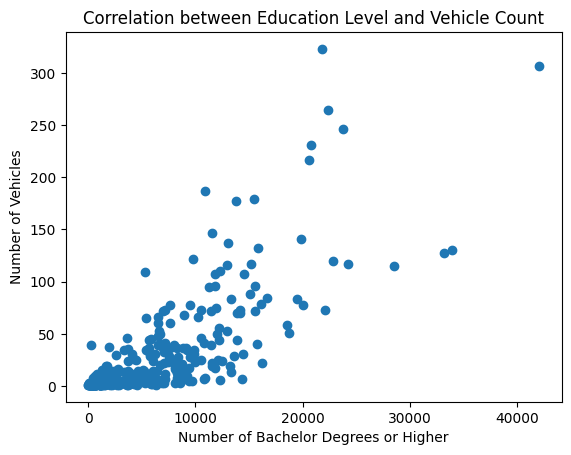

In [80]:
# Creating a scatter plot
plt.scatter(merged_df['number_bachelor_higher'], merged_df['number_of_vehicles'])

# Add labels and title
plt.xlabel('Number of Bachelor Degrees or Higher')
plt.ylabel('Number of Vehicles')
plt.title('Correlation between Education Level and Vehicle Count')

# Showing the plot
plt.show()

*Answer to research question:* 
- The scatter plot shows a modest positive correlation between the proportion of individuals with higher education and the number of electric vehicle registrations. 
- Nevertheless, the relationship is not definitive, suggesting that other factors may play a more significant role in the decision to adopt electric vehicles.

In [ ]:
#Visual 2 - Line plot

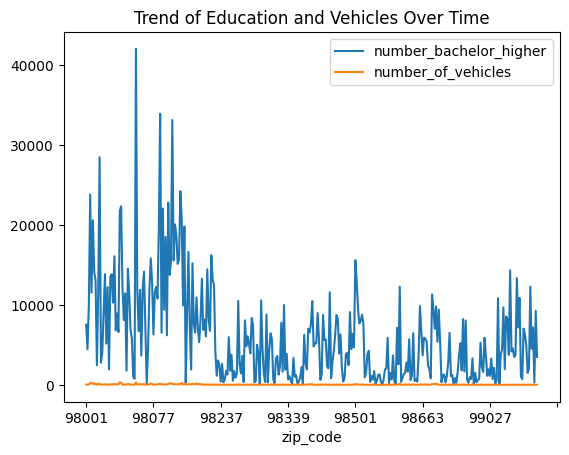

In [81]:
merged_df.plot(x='zip_code', y=['number_bachelor_higher', 'number_of_vehicles'])
plt.title('Trend of Education and Vehicles Over Time')
plt.show()

*Answer to research question:* 
- The line plot reveals that there is no apparent relationship between the trends in higher education and electric vehicle registrations. This suggests that higher education levels may not be a primary factor influencing the adoption of electric vehicles.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* 
1. If there is more time: I will wait for the data.census.gov to resolve the issue of their website which would allow me to directly utilize their API for data acquisition. This would then enable the exploration of additional variables within the dataset.
2. If there are more readily available data on electric vehicle ownership across all US states, I could explore a wider range of factors potentially influencing the decision to adopt electric vehicles.